<a href="https://colab.research.google.com/github/mikealeixogf/logic_fuzzy/blob/main/custobenecicioveiculo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

## Aplicação 2 da lógica nebulosa (fuzzy)
O problema consiste escolher pela compra de determinado veículo seja pautada por meio de três variaveis:

* **Entrada (antecedentes):** 

> Preço de aquisição 
>> Universo (intervalo de valores nítidos/*crisp*): entre 40.000,00 e 100.000,00 reais

>> Conjunto difuso (valores difusos): alto, baixo

> Consumo rodoviário
>> Universo (intervalo de valores nítidos/*crisp*): entre 11 km/l e 17 km/l

>> Conjunto difuso (valores difusos): alto, baixo, médio

>Custo das revisões até 60.000 km
>>Universo (intervalo de valores nítidos/*crisp*): Entre 32.000,00 e 55.000,00 reais
>>Conjunto difuso (valores difusos): baixo, razoavel, alto

* **Saída (consequentes):**

> Custo benefício

>> Universo (valores nítidos/*crisp*): 0 a 10

>> Conjunto difuso (valores difusos): baixa, média, alta

### Regras de Decisões Difusas
P= preço

C= Custo

CB = Custo-benefício

> **SE** o P é baixo **OU** C é baixo, **ENTÃO** CB é alto

>**SE** o P é baixo **OU** C é médio, **ENTÃO** CB é médio

>**SE** o P é médio **OU** C é baixo, **ENTÃO** CB é médio

>**SE** o P é médio **OU** C é médio, **ENTÃO** CB é médio

>**SE** o P é médio **OU** C é alto, **ENTÃO** CB é médio

>**SE** o P é alto **OU** C é médio, **ENTÃO** CB é médio

>**SE** o P é alto **OU** C é alto, **ENTÃO** CB é baixo

>**SE** o P é baixo **OU** C é alto, **ENTÃO** CB é médio

>**SE** o P é alto **OU** C é baixo, **ENTÃO** CB é médio

In [21]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Cria as variáveis do problema
preco = ctrl.Antecedent(np.arange(40000,100000,1), 'preco')
consumo = ctrl.Antecedent(np.arange(11,18,1), 'consumo')
custobeneficio = ctrl.Consequent(np.arange(0,11,0.5), 'Custo Benefício')

# Cria automaticamente o mapeamento entre valores nítidos e difusos 
# usando uma função de pertinência padrão (triângulo)

preco.automf(number=3, names = ['baixo', 'médio','alto'])
consumo.automf(number=3, names= ['alto','médio','baixo'])

# Cria as funções de pertinência usando tipo triangular
custobeneficio['baixo'] =fuzz.trimf(custobeneficio.universe, [0, 2.5, 5])
custobeneficio['médio'] = fuzz.trimf(custobeneficio.universe, [2.5, 5, 7.5])
custobeneficio['alto'] = fuzz.trimf(custobeneficio.universe, [5,7.5, 10])



### Mostrando graficamente as funções de partinência criadas

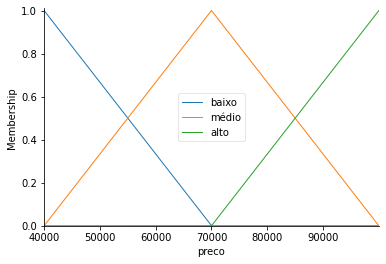

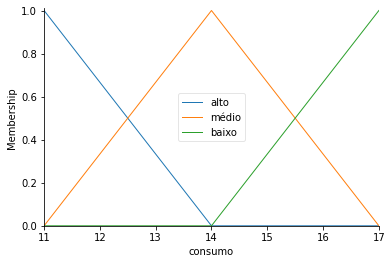

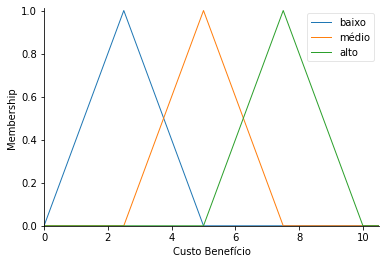

In [23]:
preco.view()
consumo.view()
custobeneficio.view()

### Criando as regras de decisão difusas

In [24]:
regra1 = ctrl.Rule(preco['baixo'] | consumo['baixo'], custobeneficio ['alto'])
regra2 = ctrl.Rule(preco['baixo'] | consumo['médio'], custobeneficio ['médio'])
regra3 = ctrl.Rule(preco['médio'] | consumo['baixo'], custobeneficio ['médio'])
regra4 = ctrl.Rule(preco['médio'] | consumo['médio'], custobeneficio ['médio'])
regra5 = ctrl.Rule(preco['médio'] | consumo['alto'], custobeneficio ['médio'])
regra6 = ctrl.Rule(preco['alto'] | consumo['médio'], custobeneficio ['médio'])
regra7 = ctrl.Rule(preco['alto'] | consumo['alto'], custobeneficio ['baixo'])
regra8 = ctrl.Rule(preco['baixo'] | consumo['alto'], custobeneficio ['médio'])
regra9 = ctrl.Rule(preco['alto'] | consumo['baixo'], custobeneficio ['médio'])

### Criando e simulando um controlador nebuloso

In [33]:
recomendacao_compra = ctrl.ControlSystem([regra1,regra2,regra3,regra4,regra5,regra6,regra7,regra8,regra9])
recomendacao_simulacao = ctrl.ControlSystemSimulation(recomendacao_compra)

# Entrando com alguns valores

recomendacao_simulacao.input['preco'] =50000
recomendacao_simulacao.input['consumo'] =16
# Computando o resultado
recomendacao_simulacao.compute()
print(recomendacao_simulacao.output['Custo Benefício'])


6.25


### Mostrando graficamente o resultado

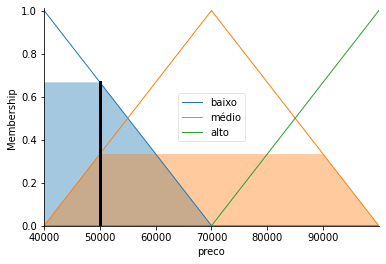

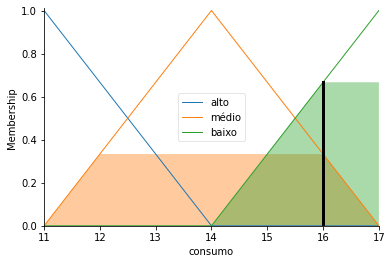

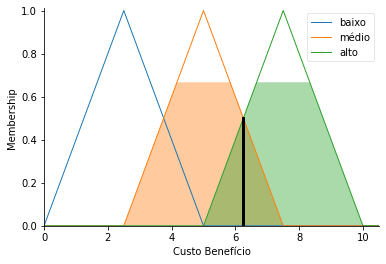

In [36]:
preco.view(sim = recomendacao_simulacao)
consumo.view(sim = recomendacao_simulacao)
custobeneficio.view(sim = recomendacao_simulacao)